In [2]:
import csv
import time
# from mpu6050 import mpu6050
import numpy as np
import matplotlib.pyplot as plt


# mpu = mpu6050(0x68)
# mpu.read_accel_range()

SMALL_SIZE = 18
MEDIUM_SIZE = 22
BIGGER_SIZE = 40

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
def collectdata(filename):
    datapoints = 10000
    #TODO: Check if 10,000 data points is the right number?
    a = np.zeros((datapoints, 4))
    for i in range(datapoints):
        d = mpu.get_accel_data()
        a[i] = [time.time(), d['x'], d['y'], d['z']]
    np.savetxt('./static/data/{}.txt.gz'.format(filename), z, delimiter=',')

In [16]:
def saveimage(name, filename):
#     plt.switch_backend('Agg')
    #TODO: Uncomment matplotlib backend when running in Flask

    #Load data
    a = np.loadtxt('./static/data/{}.txt.gz'.format(filename), delimiter=',')

    #Calculate plot range
    data = np.sqrt(np.sum(np.square(a[:,1:4]), axis=1))
    max_g_ind = np.argmax(data)

    scale = 1000
    begin = max_g_ind-int((scale/2))  
    end = max_g_ind+int((scale/2))


    #Setup plot
    fig = plt.figure(figsize=(12,6))
    plt.plot(a[begin:end,0]-a[max_g_ind,0], np.zeros(end-begin)+1, '-k', alpha=0.15)
    plt.plot([0,0], [0,data[max_g_ind]*1.1], '-k', alpha=0.15)
    plt.plot(a[begin:end,0]-a[max_g_ind,0], data[begin:end], '-b')
#     plt.plot(a[begin:end,0]-a[max_g_ind,0], data[begin:end], '.', alpha=1)


    #Add labels and legends and such
    plt.text(0.15, data[max_g_ind]*0.9, 'Max g: {:.2f}'.format(data[max_g_ind]), fontsize=20, color='g')
    plt.title('Experiment: ' + name)
    plt.xlabel('Time (s)')
    plt.ylabel('Acceleration (g)')
    plt.ylim([0, data[max_g_ind]*1.05])
    plt.xlim(a[begin,0]-a[max_g_ind,0], a[end,0]-a[max_g_ind,0])
    # plt.legend([],[],['Acceleration (g)'])
#     plt.savefig('./static/data/{}.png'.format('test'), dpi=150, bbox_inches='tight')
    plt.show()


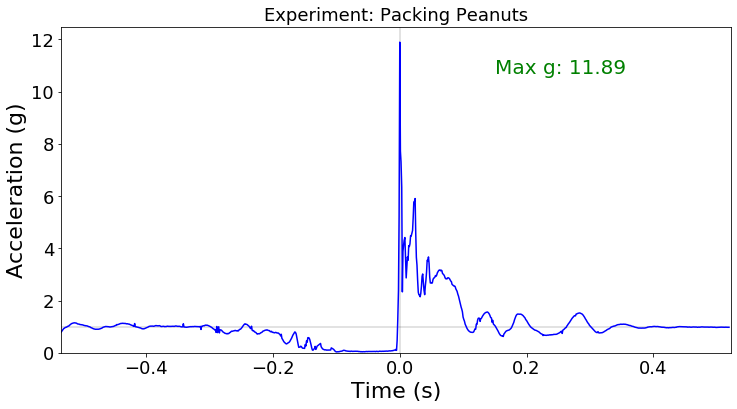

In [17]:
filename = '2020_01_19-11_13_04_Test_0_6'
name = 'Packing Peanuts'
saveimage(name, filename)